<a href="https://colab.research.google.com/github/Manojkdara/Surrogate-Model-for-1D-Nonlinear-Bar-Elasto-Plastic-/blob/main/Surrogate_Model_for_1D_Nonlinear_Bar_(Elasto_Plastic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
length = 1
area = 0.01
stress_y= 300e6
H= 5e9
F= 4e6

class pre_processing:
  def __init__(self,length,area,stress_y) :
    self.l    = length
    self.A    = area
    self.stress_y   =stress_y
    self.E = np.random.uniform(1.5e11, 2.2e11, 2000)
    self.H = np.random.uniform(2.0e9, 1.0e10, 2000)
    self.F = np.random.uniform(5.0e5, 5.0e6, 2000)


  def stress(self):
    stress = self.F /self.A
    return stress

  def elastic_strain(self):
    return self.stress()/self.E

  def yield_strain(self):
    yield_strain=  self.stress_y/self.E
    return yield_strain

  def plastic_strain(self):
    sigma = self.stress()
    plastic_strain= (sigma-self.stress_y)/self.H
    return plastic_strain

  def total_strain(self):
    sigma = self.stress()

    total_strain = np.where(sigma <= self.stress_y,self.elastic_strain(),
            self.yield_strain() + self.plastic_strain())

    return total_strain

  def displacement(self):
    u= self.total_strain()*self.l
    return u

Preparing the dataframe

In [3]:
pre_processing_call = pre_processing(length,area,stress_y)

sigma               = pre_processing_call.stress()  # array of 2000
plastic_mask        = sigma > pre_processing_call.stress_y
num_plastic         = np.sum(plastic_mask)
num_total           = len(sigma)

print("Plastic samples:", num_plastic)
print("Percentage:", num_plastic/num_total*100)

E         =pre_processing_call.E
H         =pre_processing_call.H
F         =pre_processing_call.F
u         =pre_processing_call.displacement()
df        = pd.DataFrame()
df['E']   =E
df['H']   =H
df['F']   =F
df['u']   =u

Plastic samples: 868
Percentage: 43.4


Visualization of Plastic and Elastic points

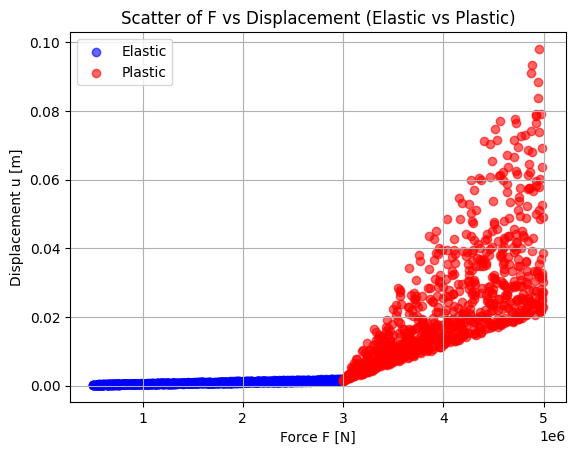

In [4]:
# Identify elastic and plastic samples
elastic_mask = F/ pre_processing_call.A <= pre_processing_call.stress_y
plastic_mask = ~elastic_mask

plt.scatter(F[elastic_mask], u[elastic_mask], color='blue', alpha=0.6, label='Elastic')   # Elastic points
plt.scatter(F[plastic_mask], u[plastic_mask], color='red', alpha=0.6, label='Plastic')    # Plastic points
plt.xlabel('Force F [N]')
plt.ylabel('Displacement u [m]')
plt.title('Scatter of F vs Displacement (Elastic vs Plastic)')
plt.legend()
plt.grid(True)
plt.show()

Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler     # Scaling

scaler    = MinMaxScaler()
norm_df   = scaler.fit_transform(df)
scaled_df = pd.DataFrame(norm_df, columns=df.columns)
scaled_df.head()

,E,H,F,u
0,0.373754,0.714169,0.378301,0.010388
1,0.540326,0.233717,0.218846,0.005692
2,0.370948,0.959899,0.628167,0.049514
3,0.516961,0.452335,0.057928,0.001790
4,0.399832,0.558675,0.732341,0.140377
